# Tugas 2 - Outlier Deteksi

## Penjelasan Outlier Deteksi
### Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding  
#### 1. Pengertian Outlier Deteksi  
Outlier merupakan data yang memiliki perbedaan mencolok dibandingkan dengan sebagian besar data lain dalam suatu dataset. Outlier bisa muncul akibat kesalahan dalam pengukuran, kesalahan input, atau memang mencerminkan fenomena unik yang berbeda dari pola umum data lainnya. Keberadaan outlier dapat mempengaruhi hasil analisis dan kinerja model machine learning, sehingga deteksi outlier menjadi langkah penting dalam proses eksplorasi data.

#### 2. Mengapa KNN Bisa Digunakan untuk Deteksi Outlier?  
Metode K-Nearest Neighbors (KNN) bekerja dengan prinsip kedekatan antar data, sehingga dapat dimanfaatkan untuk mengidentifikasi outlier. Deteksi outlier menggunakan KNN umumnya didasarkan pada konsep berikut:

* Jika suatu titik data memiliki sedikit tetangga dalam jarak tertentu, kemungkinan besar titik tersebut adalah outlier.
* Jika rata-rata jarak titik data ke k tetangga terdekatnya cukup besar, maka data tersebut dapat dianggap sebagai outlier.

#### 3. Langkah-Langkah Deteksi Outlier dengan KNN  
 1. Mengukur Jarak Antar Titik Data  
Jarak antar titik dihitung menggunakan metrik seperti Euclidean Distance, Manhattan Distance, atau Minkowski Distance untuk mengetahui seberapa dekat suatu data dengan yang lainnya.

 2. Menentukan nilai K (Jumlah Tetangga Terdekat)  
Pemilihan nilai K berpengaruh terhadap efektivitas outlier deteksi:
- Nilai K yang terlalu kecil dapat membuat model terlalu sensitif terhadap noise.  
- Nilai K yang terlalu besar bisa menyebabkan outlier tidak terdeteksi dengan baik.  

3. Menghitung Skor Kepadatan (Density Score)  
Beberapa metode untuk menilai apakah suatu titik merupakan outlier meliputi:
  * **K-Nearest Neighbor Distance** - Menghitung jarak rata-rata ke K tetangga terdekat. Jika jarak ini terlalu besar, maka titik tersebut dianggap sebagai outlier.
  * **Local Outlier Factor (LOF)** - Metode ini membandingkan kepadatan lokal suatu titik dengan kepadatan tetangganya. Jika kepadatan lokal suatu titik lebih rendah dibandingkan tetangganya, maka titik tersebut bisa dianggap sebagai outlier.  
  * **Distance-Based Outlier Score** - Jika sebuah titik memiliki jumlah tetangga yang sangat sedikit dalam radius tertentu, maka titik tersebut kemungkinan besar adalah outlier..  

#### 4. Kelebihan dan Kekurangan Metode KNN untuk Deteksi Outlier  
Kelebihan:  
- Sederhana dan intuitif karena berbasis pada konsep jarak antar titik.  
- Tidak bergantung pada asumsi distribusi data tertentu, sehingga dapat diterapkan pada berbagai jenis dataset.
- Cocok untuk data berdimensi tinggi.

Kekurangan:  
- Memerlukan komputasi yang besar, terutama untuk dataset dalam skala besar karena harus menghitung jarak ke banyak titik.  
- Pemilihan nilai K sangat menentukan hasil deteksi outlier, dan pemilihan yang kurang tepat dapat mengurangi akurasi.

#### Kesimpulan  
KNN adalah metode yang efektif untuk mendeteksi outlier dalam tahap eksplorasi data dengan cara menganalisis kedekatan suatu titik dengan tetangga terdekatnya. Pendekatan seperti K-Nearest Neighbor Distance dan Local Outlier Factor (LOF) memungkinkan identifikasi titik-titik dengan kepadatan rendah atau yang jauh dari pola umum data sebagai outlier. Pemilihan nilai K yang optimal serta penggunaan metrik jarak yang sesuai menjadi faktor kunci keberhasilan dalam deteksi outlier menggunakan KNN.

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  5.424942    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 46.407542     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  5.430470    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  5.273519    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  5.485435    False
  6     Iris-setosa           1.7          0.4           5.4          3.9  5.288667    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  5.412947    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  5.325411    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  5.316014    False
 10     Iris-setosa           1.5          0.1           4.9          

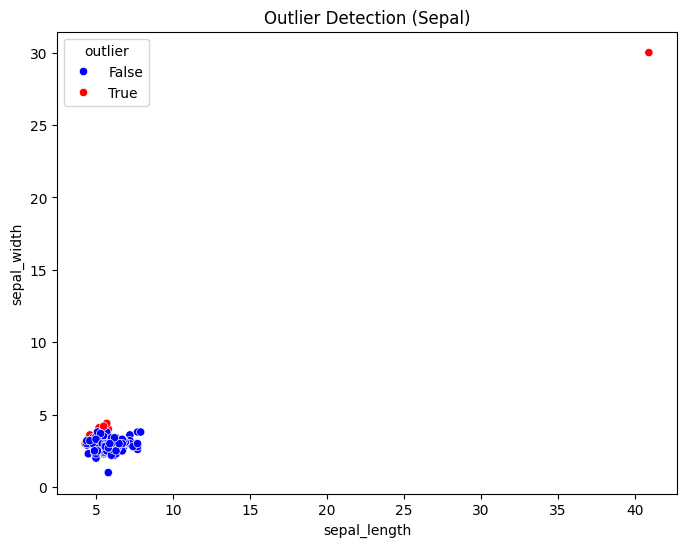

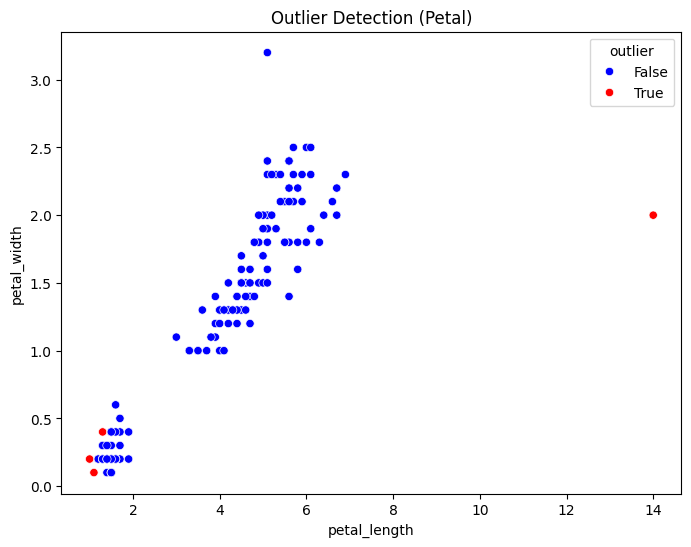

In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="postgresqltest-projectadzin.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_k58rpi0pi31N8ucX-vK",
        database="defaultdb",
        port=16209
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-386c0068-projectadzin.l.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Zr6_we8osFXobQb3qi",
        database="iris",
        port=16209
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 95)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


In [3]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 10


In [4]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  distance  outlier
151           ?????           5.1          3.2           5.8          1.0  0.000000    False
114  Iris-virginica           5.0          2.0           5.7          2.5  1.926136    False
115  Iris-virginica           5.1          2.4           5.8          2.8  1.969772    False
147  Iris-virginica           5.0          1.9           6.3          2.5  2.049390    False
120  Iris-virginica           5.0          1.5           6.0          2.2  2.092845    False
102  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
143  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
122  Iris-virginica           4.9          2.0           5.6          2.8  2.181742    False
 69 Iris-versicolor           4.5          1.5           6.2          2.2  2.202272    False
133  Iris-virginica           5.6          2.2           6.4          